# Explotatory Data Analysis
## Using cleaned data (see cleaning notebooks) to analyse teams performance

### Import required libraries

In [2]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from lxml import html
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Load Regular season data as DF

In [27]:
dfRS = pd.read_csv("PLL_RegSeason_Clean.csv")
dfRS.head()

,full_name,team_code,number,position,games_played,points,goals,assists,1_point_attempts,1_point_percent,...,faceoff_attempts,faceoff_win_percent,first_name,last_name,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
0,Adam Ghitelman,ARC,8,Goalie,9,0,0,0,0-0,0.0%,...,0-0,0.0%,Adam,Ghitelman,0,0,0,2,0,0
1,Austin Sims,ARC,18,Midfield,3,2,2,0,2-10,20.0%,...,0-0,0.0%,Austin,Sims,2,10,0,2,0,0
2,Ben McIntosh,ARC,90,Midfield,10,13,11,2,11-43,25.5%,...,0-0,0.0%,Ben,McIntosh,11,43,0,1,0,0
3,Christian Cuccinello,ARC,30,Attack,8,12,8,4,8-27,29.6%,...,0-0,0.0%,Christian,Cuccinello,8,27,0,1,0,0
4,Danny Eipp,ARC,3,Midfield,9,9,5,4,5-19,26.3%,...,0-0,0.0%,Danny,Eipp,5,19,0,0,0,0


### Load Postseason DF

In [4]:
dfPS = pd.read_csv("PLL_PostSeason_Clean.csv")
dfPS.head()

,full_name,team_code,number,position,games_played,points,goals,assists,1_point_attempts,1_point_percent,...,faceoff_attempts,faceoff_win_percent,first_name,last_name,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
0,Adam Ghitelman,ARC,8,Goalie,3,1,0,1,0-0,0.0%,...,0-0,0.0%,Adam,Ghitelman,0,0,0,0,0,0
1,Austin Sims,ARC,18,Midfield,1,0,0,0,0-3,0.0%,...,0-0,0.0%,Austin,Sims,0,3,0,0,0,0
2,Ben McIntosh,ARC,90,Midfield,2,3,1,2,1-7,14.2%,...,0-0,0.0%,Ben,McIntosh,1,7,0,0,0,0
3,Christian Cuccinello,ARC,30,Attack,3,5,4,1,4-9,44.4%,...,0-0,0.0%,Christian,Cuccinello,4,9,0,0,0,0
4,Danny Eipp,ARC,3,Midfield,3,6,3,3,3-9,33.3%,...,0-0,0.0%,Danny,Eipp,3,9,0,0,0,0


## Inspecting Correlation
Seaborn Correlation viz code from: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

As one could guess there are fairly strong correlations between all major stats that are recorded - more goals leads to more points overall etc

In [5]:
RScorr = dfRS.corr()
RScorr

,games_played,points,goals,assists,total_shots,shots_on_goal,turnovers,caused_turnovers,groundballs,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
games_played,1.000000,0.511279,0.493032,0.446713,0.521576,0.504366,0.567159,0.449568,0.545423,0.475841,0.492972,0.277292,0.386372,0.165802,0.169036
points,0.511279,1.000000,0.965049,0.899714,0.941673,0.940677,0.851625,-0.070470,0.095251,0.949887,0.945473,0.415639,0.417129,-0.022530,-0.027718
goals,0.493032,0.965049,1.000000,0.765845,0.951272,0.964042,0.809284,-0.080504,0.079675,0.990952,0.956068,0.384871,0.416536,-0.038519,-0.042598
assists,0.446713,0.899714,0.765845,1.000000,0.773387,0.762350,0.804752,-0.066667,0.100779,0.769521,0.799562,0.221823,0.225968,0.005227,-0.000472
total_shots,0.521576,0.941673,0.951272,0.773387,1.000000,0.982736,0.818270,-0.074489,0.062846,0.933355,0.985942,0.430146,0.534485,-0.036846,-0.042601
shots_on_goal,0.504366,0.940677,0.964042,0.762350,0.982736,1.000000,0.826243,-0.082566,0.057734,0.954274,0.983153,0.378221,0.453265,-0.051694,-0.054913
turnovers,0.567159,0.851625,0.809284,0.804752,0.818270,0.826243,1.000000,0.055129,0.281075,0.808778,0.825337,0.264597,0.343421,0.126193,0.120916
caused_turnovers,0.449568,-0.070470,-0.080504,-0.066667,-0.074489,-0.082566,0.055129,1.000000,0.474358,-0.095321,-0.113707,0.075919,0.163856,0.006527,0.009859
groundballs,0.545423,0.095251,0.079675,0.100779,0.062846,0.057734,0.281075,0.474358,1.000000,0.075072,0.054166,0.057357,0.073030,0.769119,0.771614
1_point_goals,0.475841,0.949887,0.990952,0.769521,0.933355,0.954274,0.808778,-0.095321,0.075072,1.000000,0.954779,0.257513,0.324123,-0.039215,-0.042901


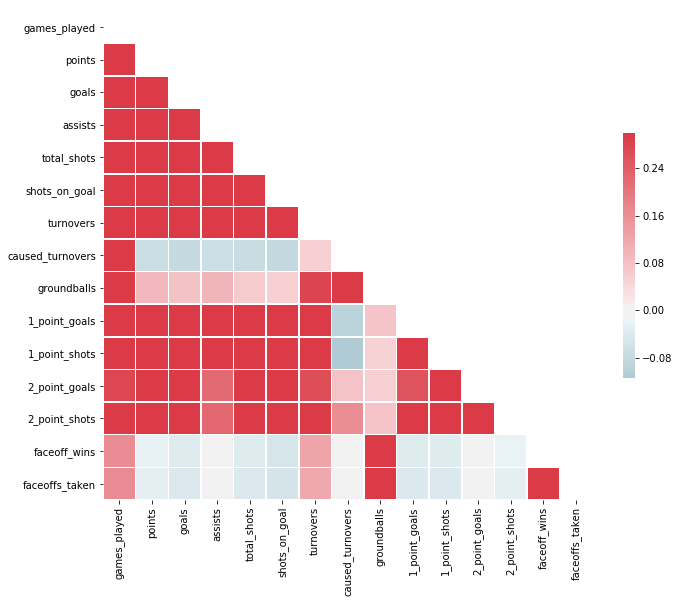

In [6]:
mask = np.triu(np.ones_like(RScorr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(RScorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [7]:
PScorr = dfPS.corr()
PScorr

,games_played,points,goals,assists,total_shots,shots_on_goal,turnovers,caused_turnovers,groundballs,1_point_goals,1_point_shots,2_point_goals,2_point_shots,faceoff_wins,faceoffs_taken
games_played,1.000000,0.439426,0.401117,0.418679,0.451757,0.443909,0.502718,0.443565,0.530065,0.394174,0.433922,0.130834,0.208229,0.170211,0.172419
points,0.439426,1.000000,0.962487,0.830733,0.879039,0.907682,0.669301,0.112130,0.154657,0.928850,0.863219,0.390163,0.313174,0.001090,-0.011725
goals,0.401117,0.962487,1.000000,0.680123,0.896904,0.934079,0.622171,0.134339,0.133143,0.977948,0.885647,0.347469,0.295739,-0.019385,-0.026924
assists,0.418679,0.830733,0.680123,1.000000,0.665611,0.664386,0.654598,0.047829,0.175579,0.704857,0.697881,0.057933,0.021554,0.050736,0.028384
total_shots,0.451757,0.879039,0.896904,0.665611,1.000000,0.975066,0.678105,0.120151,0.105505,0.885142,0.981476,0.275650,0.358831,-0.046820,-0.052106
shots_on_goal,0.443909,0.907682,0.934079,0.664386,0.975066,1.000000,0.662718,0.120054,0.102905,0.917060,0.956245,0.308494,0.353583,-0.050789,-0.057802
turnovers,0.502718,0.669301,0.622171,0.654598,0.678105,0.662718,1.000000,0.234427,0.325887,0.634163,0.679202,0.100743,0.176784,0.111217,0.089063
caused_turnovers,0.443565,0.112130,0.134339,0.047829,0.120151,0.120054,0.234427,1.000000,0.391103,0.132798,0.104945,0.040296,0.106354,-0.034001,-0.047097
groundballs,0.530065,0.154657,0.133143,0.175579,0.105505,0.102905,0.325887,0.391103,1.000000,0.138661,0.105171,0.008307,0.029967,0.763580,0.735466
1_point_goals,0.394174,0.928850,0.977948,0.704857,0.885142,0.917060,0.634163,0.132798,0.138661,1.000000,0.905988,0.143971,0.136173,-0.012313,-0.021095


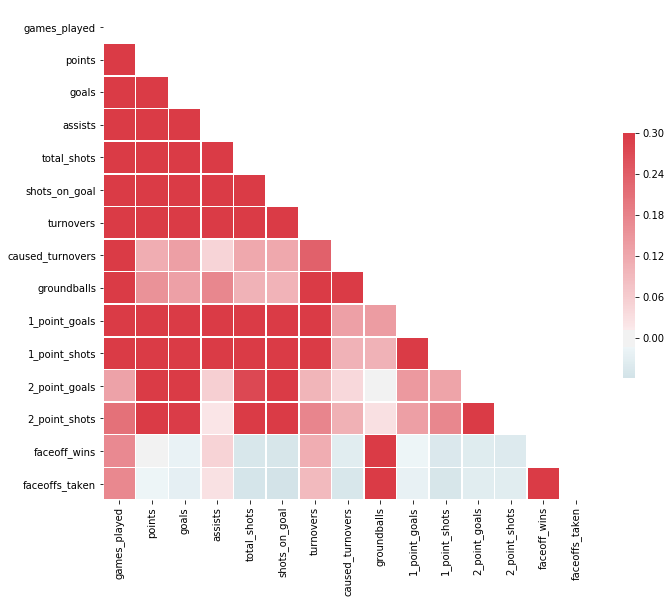

In [8]:
mask = np.triu(np.ones_like(PScorr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(PScorr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Regular season Team size
Interested to see if the size of the team impacted results

In [9]:
RS_team_size = dfRS.team_code.value_counts().values
RS_team_size[0:6]

array([34, 32, 30, 30, 29, 29], dtype=int64)

In [10]:
teams = dfRS.team_code.unique()
teams

array(['ARC', 'ATL', 'CHA', 'CHR', 'RED', 'WHP'], dtype=object)

In [11]:
[dfRS.team_code.value_counts().mean(), dfRS.team_code.value_counts().std()]


[30.666666666666668, 1.9663841605003503]

Text(0.5, 1.0, 'Team Size during Regular Season')

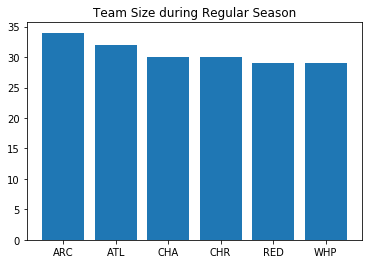

In [12]:
plt.bar(x=teams, height=RS_team_size[0:6])
plt.title("Team Size during Regular Season")

### Postseason Team size

In [13]:
PS_team_size = dfPS.team_code.value_counts()
PS_team_size[0:6]

CHR    34
CHA    33
ATL    31
WHP    30
ARC    29
RED    29
Name: team_code, dtype: int64

In [14]:
teamsPS = dfPS.team_code.unique()
teamsPS

array(['ARC', 'ATL', 'CHA', 'CHR', 'RED', 'WHP'], dtype=object)

In [15]:
[dfPS.team_code.value_counts().mean(), dfPS.team_code.value_counts().std()]

[31.0, 2.0976176963403033]

Text(0.5, 1.0, 'Team Size during Postseason')

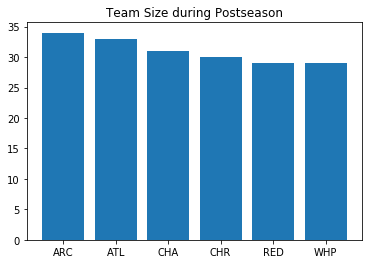

In [16]:
plt.bar(x=teamsPS, height=PS_team_size[0:6])
plt.title("Team Size during Postseason")

## Grouping by team
Using groupby to make new tables for each team to compare stats

In [17]:
GroupTeamsRS = dfRS.groupby("team_code")
GroupTeamsRS.team_code.count()

team_code
ARC    29
ATL    29
CHA    32
CHR    34
RED    30
WHP    30
Name: team_code, dtype: int64

In [18]:
GroupTeamsRS.points.mean()

team_code
ARC    6.206897
ATL    6.827586
CHA    6.156250
CHR    5.529412
RED    5.933333
WHP    6.533333
Name: points, dtype: float64

In [19]:
GroupTeamsRS.points.std()

team_code
ARC    10.153744
ATL     9.396310
CHA     8.897660
CHR     9.730412
RED     9.119639
WHP     9.825138
Name: points, dtype: float64

In [20]:
GroupTeamsRS["1_point_shots"].mean()

team_code
ARC    13.620690
ATL    11.655172
CHA    10.156250
CHR    10.882353
RED    13.100000
WHP    12.666667
Name: 1_point_shots, dtype: float64

In [21]:
GroupTeamsRS["2_point_shots"].mean()

team_code
ARC    1.517241
ATL    2.206897
CHA    1.781250
CHR    1.323529
RED    1.400000
WHP    2.066667
Name: 2_point_shots, dtype: float64

In [22]:
GroupTeamsRS.goals.sum()

team_code
ARC    106
ATL    117
CHA    118
CHR    120
RED    114
WHP    113
Name: goals, dtype: int64

In [24]:
GroupTeamsRS.goals.mean()

team_code
ARC    3.655172
ATL    4.034483
CHA    3.687500
CHR    3.529412
RED    3.800000
WHP    3.766667
Name: goals, dtype: float64

In [28]:
GroupTeamsRS.goals.describe()

,count,mean,std,min,25%,50%,75%,max
team_code,,,,,,,,
ARC,29.0,3.655172,6.493270,0.0,0.0,0.0,3.00,23.0
ATL,29.0,4.034483,6.196098,0.0,0.0,1.0,5.00,21.0
CHA,32.0,3.687500,5.647937,0.0,0.0,1.0,5.50,22.0
CHR,34.0,3.529412,6.111268,0.0,0.0,0.5,4.00,20.0
RED,30.0,3.800000,5.610335,0.0,0.0,1.0,7.75,21.0
WHP,30.0,3.766667,5.500366,0.0,0.0,1.0,5.75,19.0


## Grouping by position

In [23]:
GroupPosRS= dfRS.groupby("position")
countPos = GroupPosRS.position.count()
countPos

position
Attack      38
Defense     51
Faceoff     12
G            1
Goalie      14
M            1
Midfield    67
Name: position, dtype: int64